<a href="https://colab.research.google.com/github/MEGANAMANI/Banking_Application/blob/master/imgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_path = '/content/drive/MyDrive/Dataset/catsanddogs_imagedataset'

In [ ]:
if os.path.exists(dataset_path):
    print("Dataset found!")
else:
    print("Dataset not found. Please check the path.")

Dataset found!


In [ ]:
IMAGE_SIZE = [128, 128]
BATCH_SIZE = 32

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SIZE + [3]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

training_set = train_datagen.flow_from_directory(
    os.path.join(dataset_path, '/content/drive/MyDrive/Dataset/catsanddogs_imagedataset/train'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_set = train_datagen.flow_from_directory(
    os.path.join(dataset_path, '/content/drive/MyDrive/Dataset/catsanddogs_imagedataset/test'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation')

Found 447 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [ ]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set))

Epoch 1/10
14/14 [==============================] - 73s 5s/step - loss: 0.7494 - accuracy: 0.4810 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
14/14 [==============================] - 27s 2s/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.6905 - val_accuracy: 0.5357
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.6900 - accuracy: 0.5369 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 4/10
14/14 [==============================] - 20s 1s/step - loss: 0.6799 - accuracy: 0.5794 - val_loss: 0.6656 - val_accuracy: 0.7143
Epoch 5/10
14/14 [==============================] - 22s 1s/step - loss: 0.6675 - accuracy: 0.5794 - val_loss: 0.6511 - val_accuracy: 0.6786
Epoch 6/10
14/14 [==============================] - 22s 2s/step - loss: 0.6265 - accuracy: 0.6376 - val_loss: 0.6019 - val_accuracy: 0.6786
Epoch 7/10
14/14 [==============================] - 28s 2s/step - loss: 0.6268 - accuracy: 0.6488 - val_loss: 0.5978 - val_accuracy: 0.6429
Epoch 8/10
14/14 [==

In [ ]:
model.save('dog_cat_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    print(f"Prediction score: {prediction}")
    if prediction < 0.5:
        label = 'Cat'
    else:
        label = 'Dog'

    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 88ms/step
Prediction score: [[0.76562107]]


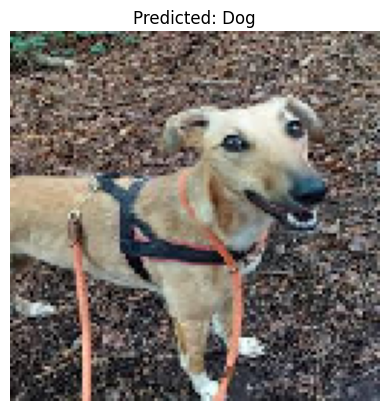

In [ ]:
image_path = '/content/drive/MyDrive/Dataset/catsanddogs_imagedataset/test/dogs/dog_114.jpg'
predict_image(image_path)